## Self-Assessment
- I thoroughly understood the content of the last lecture and completed all assigned exercises.
- The concepts were clear and well-structured, which allowed me to apply the coding norms confidently. 
- I now have a fair understanding of how to write scripts for the markdown cells and have taken less help from the AI tools, unlike the first assignment.

## Problems Faced While Completing the Exercises
- The concept of models and classifications were new to me and hence I had to look up to the book and codes provided to understand the nuances of it 

## Assignment Number 15.5 Using TSNE to Visualize the digits datset in 3D

### LabAssist
-  Modiy the TSNE object to use the three dimensions 
- Run this exercise as a script to see the cool 3D interactivity  

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [2]:
digits = load_digits()

In [3]:
# Create a t-SNE estimator to reduce data to 3 dimensions
tsne = TSNE(n_components=3, random_state=42, init='pca', learning_rate='auto')
reduced_data = tsne.fit_transform(digits.data)
reduced_data.shape

(1797, 3)

/var/folders/tf/8b0cmt6j7d54y8q8gnp5gqnr0000gn/T/ipykernel_20416/1357035225.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  dots = axes.scatter(xs=reduced_data[:, 0], ys=reduced_data[:, 1], zs=reduced_data[:, 2], c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))


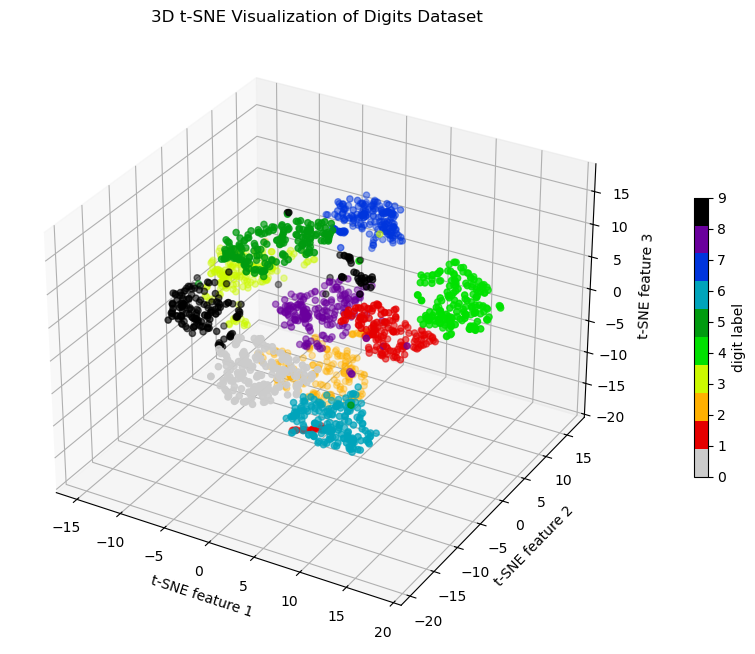

In [6]:
figure = plt.figure(figsize=(9, 9))
axes = figure.add_subplot(projection='3d')
dots = axes.scatter(xs=reduced_data[:, 0], ys=reduced_data[:, 1], zs=reduced_data[:, 2], c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
axes.set_xlabel('t-SNE feature 1')  
axes.set_ylabel('t-SNE feature 2')
axes.set_zlabel('t-SNE feature 3')
figure.colorbar(dots, ax=axes, pad=0.1, fraction=0.02, ticks=range(10), label='digit label')
axes.set_title('3D t-SNE Visualization of Digits Dataset')
plt.show()


### Explanation of Code

- Loading the Digits Dataset
- Creating a TSNE Estimator for Dimensionality Reduction - we’ll use the TSNE estimator (from the sklearn.manifold module) to perform
dimensionality reduction.
- Transforming the Digits Dataset’s Features into 3 Dimensions
- Visualizing the Reduced Data in 3D 

## Assignment Number 15.17 (Binary Classification with the Breast Cancer Dataset)

### Assist notes
-   Using this dataset, reimplement the steps of this chapter’s classification case study in Sections 15.2–15.3
-   Use the GaussianNB (short for Gaussian Naive Bayes) estimator
-   When you execute multiple classifiers (as in Section 15.3.3) to determine which one is best for the Breast Cancer Wisconsin Diagnostic dataset, include a LogisticRegression classifier in the estimators dictionary
-   Logistic regression is another popular algorithm for binary classification


In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()
cancer.data.shape # Display the shape of the data array
print(cancer.DESCR) # Display the full description of the dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
cancer.target[:20]  # display first twenty target values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [5]:
cancer.data.shape  # shape of the data array 

(569, 30)

In [6]:
cancer.target.shape # shape of the target array and check if the train and test data are balanced

(569,)

Splitting the Data for Training and Testing
* Typically **train** a model with a **subset of a dataset**
* **Save a portion for testing**, so you can evaluate a model’s performance using **unseen data**
* Function **`train_test_split`** **shuffles** the data to **randomize** it, then **splits** the **samples** in the `data` array and the **target values** in the `target` array into **training** and **testing sets**
    * Shuffling helps ensure that the **training and testing sets** have **similar characteristics**
* Convention: 
    * **Uppercase `X`** represents **samples**
    * **Lowercase `y`** represents **target values**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=11)  # random_state for reproducibility

### Training and Testing Set Sizes 
* **By default**, `train_test_split` reserves **75%** of the data for **training** and **25%** for **testing**
    * Customizable via additional arguments

In [9]:
X_train.shape

(426, 30)

In [10]:
X_test.shape

(143, 30)

### Creating the Model 
* In **scikit-learn**, **models** are called **estimators** 
* **`KNeighborsClassifier`** estimator implements the **k-nearest neighbors algorithm**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### Training the Model with the `KNeighborsClassifier` Object’s **`fit` method** (1 of 2)
* Load **sample training set (`X_train`)** and **target training set (`y_train`)** into the estimator

In [15]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

## Training the Model with the `KNeighborsClassifier` Object’s **`fit` method** (2 of 2)
* **`fit` normally loads data** into an **estimator** then performs complex calculations **behind the scenes** that **learn** from the data to train a model
* **`KNeighborsClassifier`’s `fit` method** **just loads the data** 
    * **No initial learning process** 
    * The **estimator** is **lazy** &mdash; work is performed only when you use it to make predictions
* **Lots of models** have **significant training phases** that can take minutes, hours, days or more 
    * High-performance **GPUs** and **TPUs** can significantly **reduce model training time**

In [16]:
predicted = knn.predict(X=X_test)

In [17]:
expected = y_test

In [18]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [19]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [22]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
len(wrong)

8

**Incorrectly predicting 8 samples out of 569**

## Metrics for Measuring Model Accuracy 

### Estimator Method `score`
* Returns an **indication of how well the estimator performs** on **test data** 
* For **classification estimators**, returns the **prediction accuracy** for the test data:

In [21]:
print(f'{knn.score(X_test, y_test):.2%}')

94.41%


### Confusion Matrix (1 of 2)
* Shows correct and incorrect predicted values (the **hits** and **misses**) for a given class 

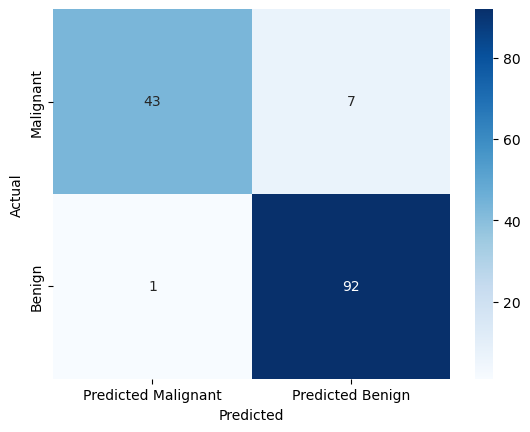

In [25]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

confusion_df = pd.DataFrame(confusion, index=['Malignant', 'Benign'], columns=['Predicted Malignant', 'Predicted Benign'])
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### K-Fold Cross-Validation
* Uses **all of your data** for **training and testing**
* Gives a better sense of how well your model will make predictions
* **Splits the dataset** into **_k_ equal-size folds** (unrelated to**&nbsp;k** in the k-nearest neighbors algorithm)
* **Repeatedly trains** your model with **_k_ – 1 folds** and **test the model** with the **remaining fold**
* Consider using **_k_ = 10** with **folds numbered 1 through 10**
	* **train** with **folds 1–9**, then **test** with **fold 10**
	* **train** with **folds 1–8 and 10**, then **test** with **fold 9**
	* **train** with **folds 1–7** and **9–10**, then **test** with **fold 8**

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold = KFold(n_splits=10, random_state=11, shuffle=True)

### Calling Function `cross_val_score` to Train and Test Your Model (1 of 2)
* **`estimator=knn`** &mdash; **estimator** to validate
* **`X=digits.data`** &mdash; **samples** to use for training and testing
* **`y=digits.target`** &mdash; **target predictions** for the samples
* **`cv=kfold`** &mdash; **cross-validation generator** that defines how to **split** the **samples** and **targets** for training and testing

In [32]:
scores = cross_val_score(estimator=knn, X=cancer.data, y=cancer.target, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.2%}')

Cross-validation scores: [0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]
Mean accuracy: 92.79%


### Running Multiple Models to Find the Best One (1 of 3)
* **Difficult to know in advance** which machine learning model(s) will **perform best for a given dataset**
    * Especially when they hide the details of how they operate
* Even though the **`KNeighborsClassifier`** predicts digit images with a high degree of accuracy, it’s **possible** that other estimators are **even more accurate**
* Let’s **compare** **`KNeighborsClassifier`**, and **`GaussianNB`**

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

estimators = {
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=10000),
    'KNeighborsClassifier': KNeighborsClassifier()}


In [46]:
results = {}
for name, estimator in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator, X=cancer.data, y=cancer.target,  cv=kfold, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name}: Mean Accuracy = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Determine the best estimator
best_estimator = max(results, key=results.get)
print(f"\nBest Estimator: {best_estimator} with accuracy {results[best_estimator]:.4f}")

GaussianNB: Mean Accuracy = 0.9385 (+/- 0.0550)
LogisticRegression: Mean Accuracy = 0.9508 (+/- 0.0603)
KNeighborsClassifier: Mean Accuracy = 0.9279 (+/- 0.0401)

Best Estimator: LogisticRegression with accuracy 0.9508


**`GaussianLogistic Regression` estimator accuracy is more so we might want to **perform hyperparameter tuning** on each to determine the best

### Hyperparameter Tuning
* In real-world machine learning studies, you’ll want to **tune hyperparameters** to choose values that produce the **best possible predictions**
* To **determine** the **best value** for **_k_** in the **Logistic Regression **, **try different values** and **compare performance**  
* Scikit-learn also has **automated hyperparameter tuning** capabilities

In [47]:
for k in range(1, 20, 2):  # k is an odd value 1-19; odds prevent ties
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    logit_reg = LogisticRegression(random_state=42, max_iter=10000)
    scores = cross_val_score(estimator=logit_reg, 
        X=cancer.data, y=cancer.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=95.08%; standard deviation=3.02%
k=3 ; mean accuracy=95.08%; standard deviation=3.02%
k=5 ; mean accuracy=95.08%; standard deviation=3.02%
k=7 ; mean accuracy=95.08%; standard deviation=3.02%
k=9 ; mean accuracy=95.08%; standard deviation=3.02%
k=11; mean accuracy=95.08%; standard deviation=3.02%
k=13; mean accuracy=95.08%; standard deviation=3.02%
k=15; mean accuracy=95.08%; standard deviation=3.02%
k=17; mean accuracy=95.08%; standard deviation=3.02%
k=19; mean accuracy=95.08%; standard deviation=3.02%
